### Gibbs Sampler 

In [73]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

#### 1.Define hyperparameter 

In [3]:
x = np.array([10,13,15,11,9,18,20,17,23,21])
mu0 = 14
sig0 = 2
alpha = 3
beta = 2
n = len(x)

#### 2.Gibbs Sampling Step 

In [4]:
T = 10000
theta = np.ones((T,2))

In [57]:
for iter in range(1,T):
    
    #### 1. sampling step for mu
    
    var = 1/(n/theta[iter-1,1]+1/(sig0)**2)
    mu  = (sum(x)/theta[iter-1,1] + mu0/(sig0)**2) * var
    
    theta[iter,0] = np.random.normal(mu,math.sqrt(var))
    
    #### 2. sampling step for sigma^2
  
    n_alpha = n/2 + alpha
    n_beta  = 0.5*sum((theta[iter,0]-x)**2) + beta
  
    theta[iter,1] = 1/np.random.gamma(n_alpha,1/n_beta) 

#### 3. Checking Trace/Density Plot

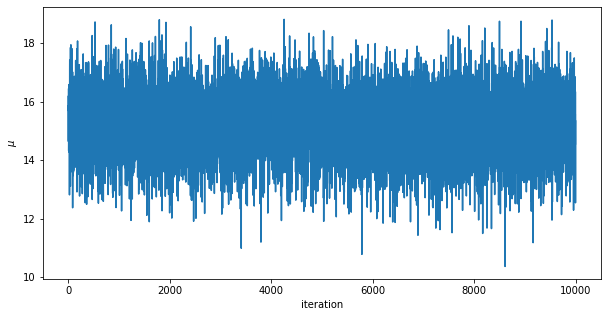

In [62]:
plt.plot(theta[:,0])
plt.xlabel("iteration")
plt.ylabel(r'$\mu$')
plt.show()

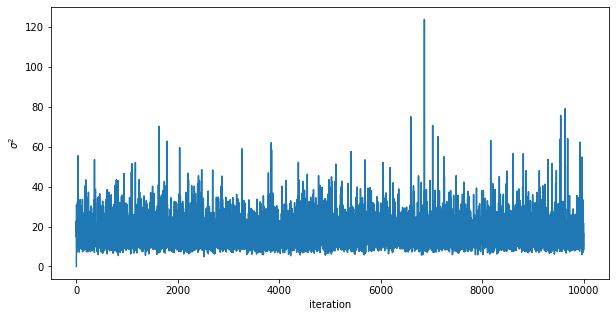

In [64]:
plt.plot(theta[:,1])
plt.xlabel("iteration")
plt.ylabel(r'$\sigma^2$')
plt.show()

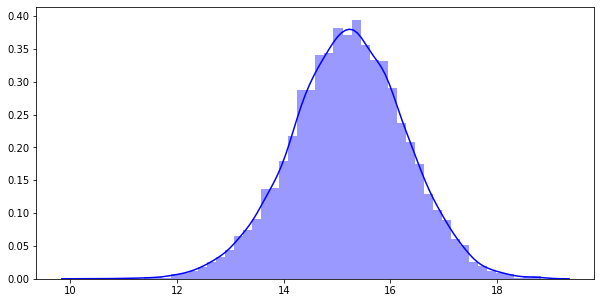

In [72]:
sns.distplot(theta[:,0], color="blue")
plt.show()

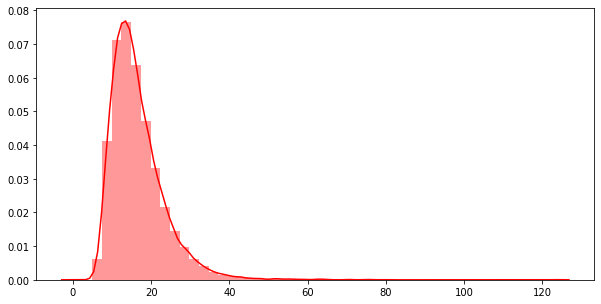

In [71]:
sns.distplot(theta[:,1], color="red")
plt.show()